In [3]:
# =====================================
# 🧠 PREDICTING DEMAND FOR PERISHABLE GOODS
# =====================================

# --- IMPORT LIBRARIES ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
        mean_absolute_error,
            mean_squared_error,
                mean_absolute_percentage_error
                )


In [6]:

# =====================================
# STEP 1: LOAD DATA
# =====================================
product_detail = pd.read_csv(r"Data/product_details.csv")
store_info = pd.read_csv(r"Data/store_info.csv")
supplier_info = pd.read_csv(r"Data/supplier_info.csv")
weather_data = pd.read_csv(r"Data/weather_data.csv")
weekly_sales = pd.read_csv(r"Data/weekly_sales.csv")



In [4]:

# =====================================
# STEP 2: EDA FUNCTION
# =====================================
def eda_stage_1(data, name):
    print("=" * 100)
    print(f"{name} dataset info")
    print(data.info())
    print("=" * 100)
    print(f"{name} dataset shape: {data.shape}")
    print("=" * 100)
    print(f"{name} dataset description")
    print(data.describe())
    print("=" * 100)
    print(f"{name} dataset missing values")
    print(data.isna().sum())
    print("=" * 100)
    print(f"{name} dataset duplicates: {data.duplicated().sum()}")

eda_stage_1(product_detail, "Product Detail")
eda_stage_1(supplier_info, "Supplier Info")
eda_stage_1(store_info, "Store Info")
eda_stage_1(weekly_sales, "Weekly Sales")
eda_stage_1(weather_data, "Weather Data")


Product Detail dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        48 non-null     int64 
 1   Product_Name      48 non-null     object
 2   Product_Category  48 non-null     object
 3   Shelf_Life_Days   48 non-null     int64 
 4   Supplier_ID       48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB
None
Product Detail dataset shape: (48, 5)
Product Detail dataset description
       Product_ID  Shelf_Life_Days  Supplier_ID
count       48.00        48.000000    48.000000
mean      1023.50        59.916667     5.958333
std         14.00        99.226333     2.782608
min       1000.00         2.000000     1.000000
25%       1011.75         4.000000     4.000000
50%       1023.50         7.500000     6.000000
75%       1035.25        36.250000     8.000000
max       1047.00       356.000000  

In [7]:
# =====================================
# STEP 3: BASIC DESCRIPTIVE ANALYSIS
# =====================================
print(f"We have {len(product_detail['Product_Category'].value_counts())} product categories.")
print(f"We have {len(product_detail)} total products in store.")
print(f"The sales dataset covers {len(weekly_sales)} weeks.")
print(f"Total units sold: {weekly_sales['Units_Sold'].sum():,}")
print(f"Total wastage units: {weekly_sales['Wastage_Units'].sum():,}")
print(f"Average wastage units per region: {weekly_sales['Wastage_Units'].mean():,.2f}")


We have 4 product categories.
We have 48 total products in store.
The sales dataset covers 37440 weeks.
Total units sold: 61,482,249
Total wastage units: 4,786,490
Average wastage units per region: 127.84


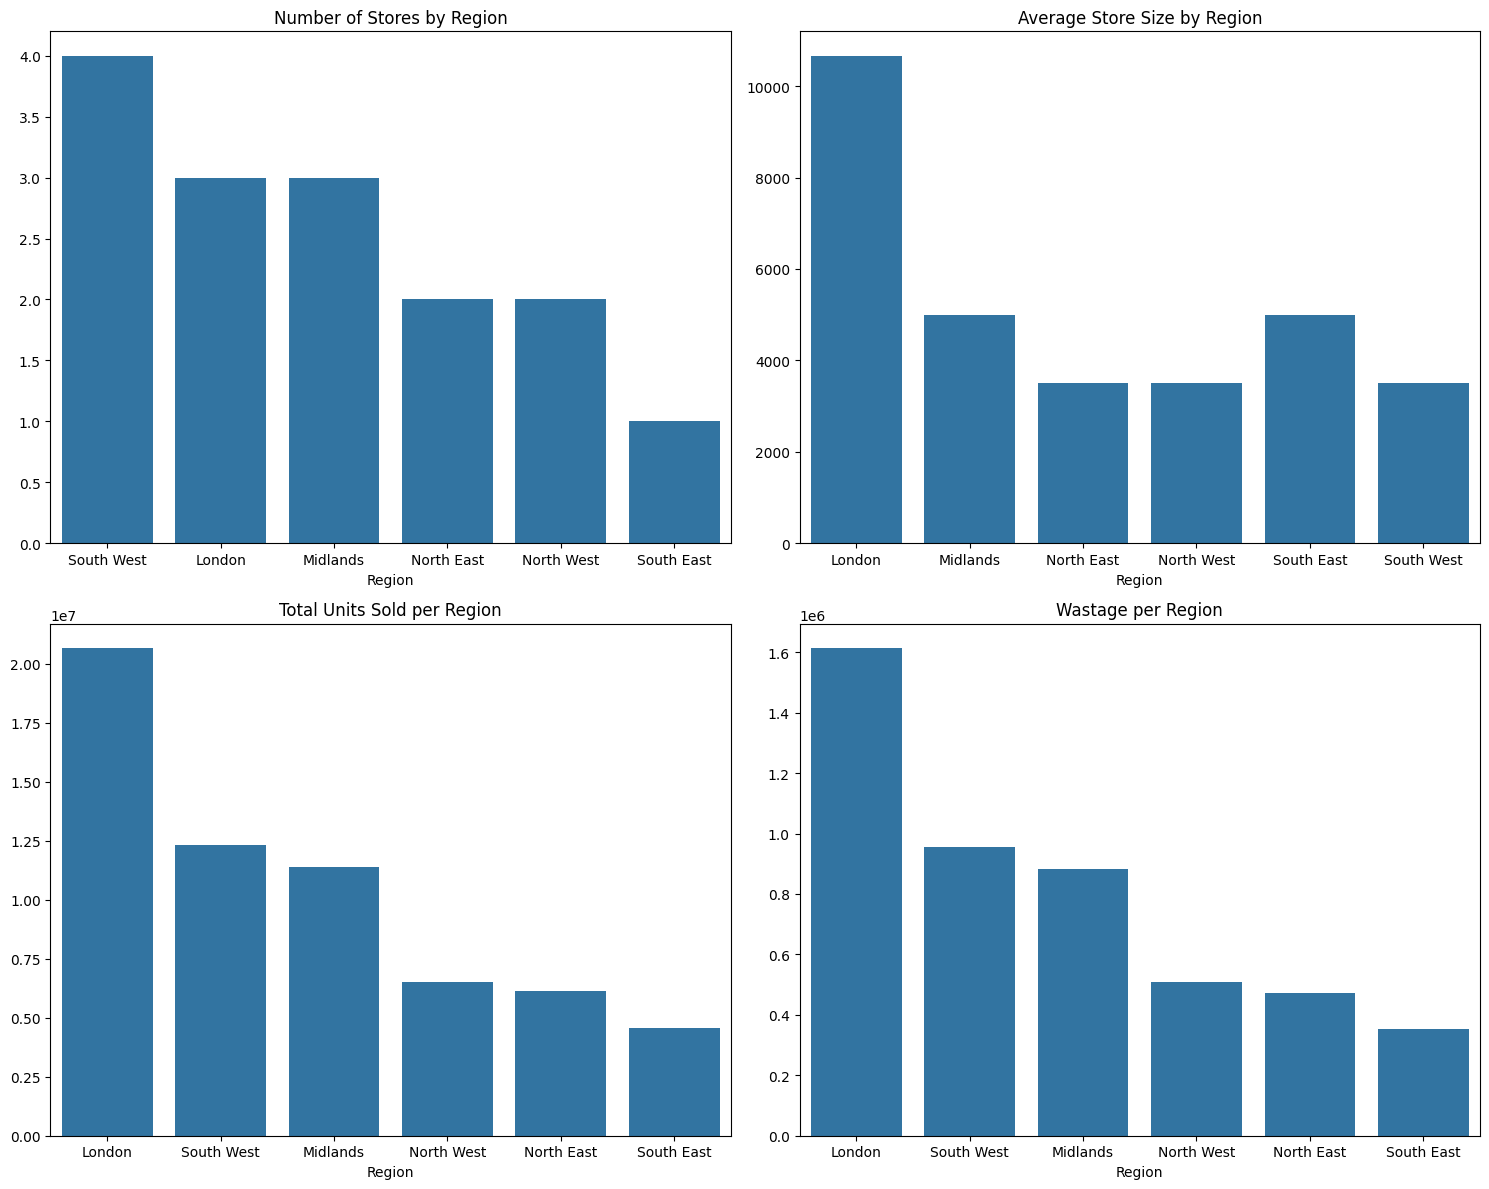

In [8]:
# =====================================
# STEP 4: VISUAL ANALYSIS
# =====================================
# --- Sales and Wastage by Region ---
plt.figure(figsize=(15, 12))

# 1. Stores per Region
plt.subplot(2, 2, 1)
region_store_counts = store_info['Region'].value_counts()
sns.barplot(x=region_store_counts.index, y=region_store_counts.values)
plt.title("Number of Stores by Region")

# 2. Average Store Size
plt.subplot(2, 2, 2)
store_size_by_region = store_info.groupby('Region')['Store_Size'].mean()
sns.barplot(x=store_size_by_region.index, y=store_size_by_region.values)
plt.title("Average Store Size by Region")

# 3. Total Units Sold
plt.subplot(2, 2, 3)
region_sales = weekly_sales.merge(store_info, on="Store_ID")
sales_region = region_sales.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)
sns.barplot(x=sales_region.index, y=sales_region.values)
plt.title("Total Units Sold per Region")

# 4. Total Wastage
plt.subplot(2, 2, 4)
wastage_region = region_sales.groupby('Region')['Wastage_Units'].sum().sort_values(ascending=False)
sns.barplot(x=wastage_region.index, y=wastage_region.values)
plt.title("Wastage per Region")

plt.tight_layout()
plt.show()


/tmp/ipykernel_9986/4219390534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


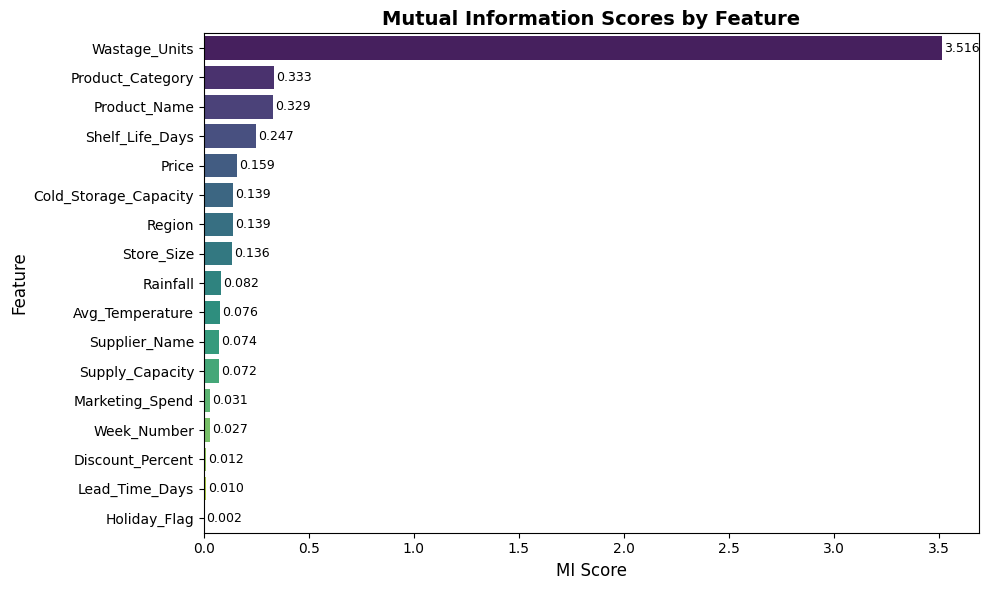

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='MI_Score',
    y='Feature',
    data=feature_importance.sort_values(by='MI_Score', ascending=False),
    palette='viridis'
)

plt.title("Mutual Information Scores by Feature", fontsize=14, fontweight='bold')
plt.xlabel("MI Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Add value labels for clarity
for index, value in enumerate(feature_importance.sort_values(by='MI_Score', ascending=False)['MI_Score']):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [24]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

training_features = feature_importance['Feature'].tolist()


In [25]:
training_features

['Wastage_Units',
 'Product_Category',
 'Product_Name',
 'Shelf_Life_Days',
 'Price',
 'Cold_Storage_Capacity',
 'Region',
 'Store_Size',
 'Rainfall',
 'Avg_Temperature',
 'Supplier_Name',
 'Supply_Capacity',
 'Marketing_Spend',
 'Week_Number',
 'Discount_Percent',
 'Lead_Time_Days',
 'Holiday_Flag']

In [26]:
training_features = feature_importance.head(10)['Feature'].tolist()
training_features


['Wastage_Units',
 'Product_Category',
 'Product_Name',
 'Shelf_Life_Days',
 'Price',
 'Cold_Storage_Capacity',
 'Region',
 'Store_Size',
 'Rainfall',
 'Avg_Temperature']

In [11]:

# =====================================
# STEP 5: MERGE ALL DATASETS
# =====================================
merged_data = (
    product_detail
    .merge(weekly_sales, on='Product_ID', how='inner')
    .merge(store_info, on='Store_ID', how='inner')
    .merge(supplier_info, on='Supplier_ID', how='inner')
    .merge(weather_data, on=['Week_Number', 'Region'], how='inner')
)
merged_data

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID,Week_Number,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,...,Price,Region,Store_Size,Cold_Storage_Capacity,Supplier_Name,Lead_Time_Days,Supply_Capacity,Avg_Temperature,Rainfall,Holiday_Flag
0,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,500,4853,670.37,0,...,2.46,London,12000,3788,PremiumGoods Wholesale,3,48776,9.9,23.0,1
1,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,501,1911,1280.28,0,...,3.76,Midlands,5000,1086,PremiumGoods Wholesale,3,48776,7.4,32.1,0
2,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,502,3080,1509.55,0,...,3.81,North East,4000,998,PremiumGoods Wholesale,3,48776,6.4,32.4,0
3,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,503,2856,1101.11,0,...,1.09,Midlands,5000,1243,PremiumGoods Wholesale,3,48776,7.4,32.1,0
4,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,504,3211,1701.66,0,...,2.72,London,10000,3330,PremiumGoods Wholesale,3,48776,9.9,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,1047,Green Tea 40bags,Beverages,92,3,2024-W52,510,1368,1157.55,0,...,1.56,North East,3000,784,FarmDirect Suppliers Ltd.,2,71976,5.2,19.2,1
37436,1047,Green Tea 40bags,Beverages,92,3,2024-W52,511,940,1159.28,0,...,6.49,South West,3000,634,FarmDirect Suppliers Ltd.,2,71976,8.7,16.2,1
37437,1047,Green Tea 40bags,Beverages,92,3,2024-W52,512,1458,662.90,0,...,4.86,South East,5000,1697,FarmDirect Suppliers Ltd.,2,71976,13.7,10.1,1
37438,1047,Green Tea 40bags,Beverages,92,3,2024-W52,513,1311,694.10,0,...,7.36,South West,4000,1322,FarmDirect Suppliers Ltd.,2,71976,8.7,16.2,1


In [12]:

# =====================================
# STEP 6: FEATURE SELECTION (MUTUAL INFORMATION)
# =====================================
from sklearn.feature_selection import mutual_info_regression

target = merged_data['Units_Sold']
X = merged_data.drop(columns=['Units_Sold'])

# Remove ID columns
X.drop(columns=['Product_ID', 'Supplier_ID', 'Store_ID'], inplace=True)

# Encode categorical columns
cat_cols = X.select_dtypes(include='object').columns
for col in cat_cols:
    X[col] = pd.Categorical(X[col]).codes

# Compute MI scores
mi_scores = mutual_info_regression(X, target, random_state=42)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

print(feature_importance.head(10))

# Top 10 Features
training_features = feature_importance.head(10)['Feature'].tolist()
print("Top Predictors:", training_features)


                  Feature  MI_Score
6           Wastage_Units  3.516303
1        Product_Category  0.333410
0            Product_Name  0.328921
2         Shelf_Life_Days  0.247019
7                   Price  0.158909
10  Cold_Storage_Capacity  0.138576
8                  Region  0.138502
9              Store_Size  0.136106
15               Rainfall  0.081719
14        Avg_Temperature  0.075515
Top Predictors: ['Wastage_Units', 'Product_Category', 'Product_Name', 'Shelf_Life_Days', 'Price', 'Cold_Storage_Capacity', 'Region', 'Store_Size', 'Rainfall', 'Avg_Temperature']


In [13]:

# =====================================
# STEP 7: LINEAR REGRESSION MODEL
# =====================================
from sklearn.linear_model import LinearRegression

def train_linear_model(data, training_features):
    X = data[training_features].copy()
    y = data['Units_Sold']

    cat_cols = X.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("Linear Regression Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MAPE: {mape * 100:.2f}%")
    return model

model_lin = train_linear_model(merged_data, training_features)


Linear Regression Performance:
RMSE: 444.499
R²: 0.857
MAE: 308.641
MAPE: 22.68%


In [29]:
# =====================================
# STEP 8: DECISION TREE REGRESSOR
# =====================================
from sklearn.tree import DecisionTreeRegressor

def train_decision_model(data, training_features):
    X = data[training_features].copy()
    y = data['Units_Sold']

    cat_cols = X.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    #TESTING 
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    print(f"Train R²: {train_r2:.3f}")

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("Decision Tree Model Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MAPE: {mape * 100:.2f}%")
    return model

model_tree = train_decision_model(merged_data, training_features)


Train R²: 1.000
Decision Tree Model Performance:
RMSE: 27.640
R²: 0.999
MAE: 9.110
MAPE: 0.69%


In [30]:

# =====================================
# STEP 9: RANDOM FOREST REGRESSOR
# =====================================
from sklearn.ensemble import RandomForestRegressor

def train_rf_model(data, training_features):
    X = data[training_features].copy()
    y = data['Units_Sold']

    cat_cols = X.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    #TESTING 
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    print(f"Train R²: {train_r2:.3f}")

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("Random Forest Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MAPE: {mape * 100:.2f}%")
    return model

model_rf = train_rf_model(merged_data, training_features)


Train R²: 1.000
Random Forest Performance:
RMSE: 33.732
R²: 0.999
MAE: 12.544
MAPE: 0.84%


In [31]:

# =====================================
# STEP 10: XGBOOST REGRESSOR
# =====================================
from xgboost import XGBRegressor

def train_xg_model(data, training_features):
    X = data[training_features].copy()
    y = data['Units_Sold']

    cat_cols = X.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = XGBRegressor(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        objective='reg:squarederror'
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    
    #TESTING 
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    print(f"Train R²: {train_r2:.3f}")

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print("XGBoost Model Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"MAPE: {mape * 100:.2f}%")

    return model

model_xgb = train_xg_model(merged_data, training_features)


Train R²: 1.000
XGBoost Model Performance:
RMSE: 88.867
R²: 0.994
MAE: 25.263
MAPE: 1.32%


Training Features on top 15 relevant 

In [27]:
# =====================================
# STEP 7B: ANALYSIS - TRAIN MODELS ON TOP 15 FEATURES
# =====================================

# Select top 15 features instead of top 10
training_features_15 = feature_importance.head(15)['Feature'].tolist()
print("Top 15 Predictors:", training_features_15)

# --- LINEAR REGRESSION ---
print("\n===== Linear Regression (Top 15 Features) =====")
model_lin_15 = train_linear_model(merged_data, training_features_15)

# --- DECISION TREE ---
print("\n===== Decision Tree (Top 15 Features) =====")
model_tree_15 = train_decision_model(merged_data, training_features_15)

# --- RANDOM FOREST ---
print("\n===== Random Forest (Top 15 Features) =====")
model_rf_15 = train_rf_model(merged_data, training_features_15)

# --- XGBOOST ---
print("\n===== XGBoost (Top 15 Features) =====")
model_xgb_15 = train_xg_model(merged_data, training_features_15)


Top 15 Predictors: ['Wastage_Units', 'Product_Category', 'Product_Name', 'Shelf_Life_Days', 'Price', 'Cold_Storage_Capacity', 'Region', 'Store_Size', 'Rainfall', 'Avg_Temperature', 'Supplier_Name', 'Supply_Capacity', 'Marketing_Spend', 'Week_Number', 'Discount_Percent']

===== Linear Regression (Top 15 Features) =====
Linear Regression Performance:
RMSE: 439.007
R²: 0.860
MAE: 307.203
MAPE: 22.80%

===== Decision Tree (Top 15 Features) =====
Decision Tree Model Performance:
RMSE: 32.390
R²: 0.999
MAE: 9.699
MAPE: 0.71%

===== Random Forest (Top 15 Features) =====
Random Forest Performance:
RMSE: 35.618
R²: 0.999
MAE: 12.736
MAPE: 0.84%

===== XGBoost (Top 15 Features) =====
XGBoost Model Performance:
RMSE: 103.983
R²: 0.992
MAE: 40.050
MAPE: 2.09%


When comparing the models trained on the top 10 versus top 15 features, the results show that adding extra features didn’t improve performance and in some cases made it slightly worse. The Linear Regression model stayed nearly identical, while both the Random Forest and XGBoost models performed marginally better with the top 10 features, showing lower RMSE and MAPE scores. The Decision Tree model achieved unrealistically perfect results in both cases, suggesting overfitting rather than genuine learning. Overall, the experiment confirms that using the top 10 features provides the most balanced and reliable performance fewer variables, faster training, and no unnecessary noise proving that quality of features matters more than quantity.